# Financial Analytics Assignment

In [1]:
import pandas as pd # data maipulation and analysis
import numpy as np # mathematical function
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt # base graphics package
import seaborn as sns # grphics package
import statsmodels.api as sm #This is for regression
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy as sc
import scipy.optimize as opt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve


In [2]:
#Reading data from the csv file
loanstatus=pd.read_csv(r'D:\Rajib\XLRI\Elective\Analytics_Assignment\2014\File\LoanStats3c_final.csv',low_memory=False)

In [3]:
print("Current shape of dataset :",loanstatus.shape)

Current shape of dataset : (235629, 145)


In [4]:
loanstatus.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10400,10400,10400,36 months,6.99%,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,15000,15000,15000,60 months,12.39%,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,21425,21425,21425,60 months,15.59%,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,12800,12800,12800,60 months,17.14%,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,9600,9600,9600,36 months,13.66%,326.53,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Generates descriptive statistics that summarize the central tendency,
#dispersion and shape of a dataset’s distribution, excluding NaN value
loanstatus.describe(include = 'all')
#u.to_csv(r"D:\Rajib\XLRI\Elective\Analytics_Assignment\2014\File\output_2-sum.csv", index=False)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,235629.000000,235629.000000,235629.000000,235629,235629,235629.000000,235629,235629,...,442.000000,442.000000,235629,235629,3844,3844,3844,3844.000000,3844.000000,3844.000000
unique,NaN,NaN,NaN,NaN,NaN,2,89,NaN,7,35,...,NaN,NaN,1,2,47,3,49,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,12.99%,NaN,C,C2,...,NaN,NaN,Cash,N,Jan-18,COMPLETE,Apr-17,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,162570,12630,NaN,66565,13965,...,NaN,NaN,235629,231785,269,2183,231,NaN,NaN,NaN
mean,NaN,NaN,14870.156793,14870.156793,14865.334169,NaN,NaN,442.456535,NaN,NaN,...,8523.401674,200.449842,NaN,NaN,NaN,NaN,NaN,4597.559784,46.891917,8.836889
std,NaN,NaN,8438.318193,8438.318193,8435.524995,NaN,NaN,245.041878,NaN,NaN,...,4677.462657,152.517590,NaN,NaN,NaN,NaN,NaN,3363.281269,10.340519,8.460601
min,NaN,NaN,1000.000000,1000.000000,950.000000,NaN,NaN,23.360000,NaN,NaN,...,174.150000,0.040000,NaN,NaN,NaN,NaN,NaN,44.210000,0.550000,0.000000
25%,NaN,NaN,8325.000000,8325.000000,8325.000000,NaN,NaN,265.680000,NaN,NaN,...,5108.352500,81.900000,NaN,NaN,NaN,NaN,NaN,2103.325000,45.000000,0.000000
50%,NaN,NaN,13000.000000,13000.000000,13000.000000,NaN,NaN,384.060000,NaN,NaN,...,8058.860000,177.710000,NaN,NaN,NaN,NaN,NaN,3900.000000,45.000000,8.000000
75%,NaN,NaN,20000.000000,20000.000000,20000.000000,NaN,NaN,578.690000,NaN,NaN,...,11593.042500,285.555000,NaN,NaN,NaN,NaN,NaN,6209.137500,50.000000,16.000000


In [6]:
#Concise summary of a DataFrame
loanstatus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235629 entries, 0 to 235628
Columns: 145 entries, id to settlement_term
dtypes: float64(68), int64(41), object(36)
memory usage: 260.7+ MB


In [7]:
#Column labels to use for resulting frame
loanstatus.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff00074390>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff00074dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff00074198>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff0012f668>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff0012fa90>],
 'means': []}

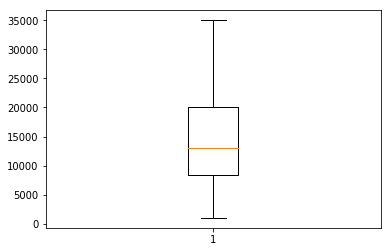

In [8]:
#########Identify outlier & remove the same
plt.boxplot(loanstatus['loan_amnt'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1ff0019f4a8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff0019fd68>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff0019f358>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff001a95f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff001a9a20>],
 'means': []}

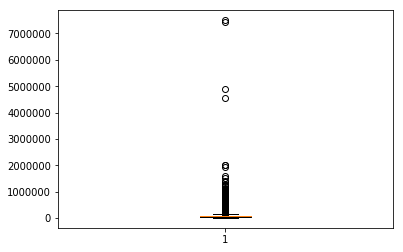

In [9]:
plt.boxplot(loanstatus['annual_inc'])

In [10]:
from scipy.stats import normaltest, iqr
cutoffincome=np.percentile(loanstatus['annual_inc'],75)+ 1.5* iqr(loanstatus['annual_inc'])
print(cutoffincome)

156934.5


In [11]:
#loanstatus=loanstatus[loanstatus['annual_inc']<cutoffincome]
#loanstatus.shape

In [12]:
#Mapped Target variable to 0 to 1
loanstatus['loan_status']=loanstatus['loan_status'].map({"Fully Paid":0, "Charged Off":1} )


In [13]:
#Return the first 5 rows.
loanstatus.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10400,10400,10400,36 months,6.99%,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,15000,15000,15000,60 months,12.39%,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,21425,21425,21425,60 months,15.59%,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,12800,12800,12800,60 months,17.14%,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,9600,9600,9600,36 months,13.66%,326.53,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
## Remove columns  not related to our target variable
removefields=[
        "id","member_id","emp_title","verification_status","url","desc"
         ,"purpose","title","zip_code","addr_state","sub_grade","term","issue_d"
         ,"pymnt_plan","dti","delinq_2yrs","earliest_cr_line","revol_bal_joint"
         ,"sec_app_earliest_cr_line","sec_app_inq_last_6mths","sec_app_mort_acc"
         ,"sec_app_open_acc","sec_app_revol_util","sec_app_open_act_il"
         ,"sec_app_num_rev_accts","sec_app_chargeoff_within_12_mths"
         ,"sec_app_collections_12_mths_ex_med","sec_app_mths_since_last_major_derog"
         ,"hardship_flag","hardship_type","hardship_reason","hardship_status"
         ,"deferral_term","hardship_amount","hardship_start_date","hardship_end_date"
          ,"payment_plan_start_date","hardship_length","hardship_dpd","hardship_loan_status","orig_projected_additional_accrued_interest"
          ,"hardship_payoff_balance_amount","hardship_last_payment_amount","disbursement_method"
         ,"debt_settlement_flag","debt_settlement_flag_date","settlement_status"
         ,"settlement_date","settlement_amount","settlement_percentage","settlement_term"
         ,"policy_code","dti_joint","last_credit_pull_d"
        ,"last_pymnt_d","next_pymnt_d","revol_util","initial_list_status"
        ,"application_type","annual_inc_joint","verification_status_joint"
        ,"tot_cur_bal","open_acc_6m","open_act_il","open_il_12m","open_il_24m","mths_since_rcnt_il"
        ,"total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util"
        ,"inq_fi","total_cu_tl","inq_last_12m","delinq_amnt","num_tl_120dpd_2m"
        ,"num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_op_past_12m"
        ,"mths_since_recent_revol_delinq","num_accts_ever_120_pd"
        ,"mths_since_last_record","mths_since_last_delinq","percent_bc_gt_75"
        ,"mths_since_last_major_derog","mths_since_recent_bc_dlq","mths_since_recent_inq"
        ,"mo_sin_old_il_acct","mo_sin_rcnt_tl"
        ,"mths_since_recent_bc"

]
finalloan = loanstatus.drop(labels = removefields, axis = 1) 
finalloan.to_csv(r"D:\Rajib\XLRI\Elective\Analytics_Assignment\2014\File\output.csv", index=False)

In [15]:
print("Current shape of dataset :",finalloan.shape)

Current shape of dataset : (235629, 53)


In [16]:
features = ["funded_amnt","emp_length","annual_inc","home_ownership","grade",
            "last_pymnt_amnt", "mort_acc", "pub_rec", "open_acc","num_actv_rev_tl",
            "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
            "avg_cur_bal","acc_open_past_24mths",
            "inq_last_6mths","total_acc","acc_now_delinq","tax_liens","int_rate"
           ,"loan_status"] 
loanstatusfinal = finalloan[features] #19 features with target var"loan_status"
print("Current shape of dataset :",loanstatusfinal.shape)

Current shape of dataset : (235629, 22)


In [17]:
##Filling Missing values
loanstatusfinal['annual_inc']=loanstatusfinal['annual_inc'].fillna(loanstatusfinal['annual_inc'].median())
loanstatusfinal['inq_last_6mths']=loanstatusfinal['inq_last_6mths'].fillna(loanstatusfinal['inq_last_6mths'].median())
loanstatusfinal['open_acc']=loanstatusfinal['open_acc'].fillna(loanstatusfinal['open_acc'].median())
loanstatusfinal['pub_rec']=loanstatusfinal['pub_rec'].fillna(loanstatusfinal['pub_rec'].median())
loanstatusfinal['total_acc']=loanstatusfinal['total_acc'].fillna(loanstatusfinal['total_acc'].median())
loanstatusfinal['acc_now_delinq']=loanstatusfinal['acc_now_delinq'].fillna(loanstatusfinal['acc_now_delinq'].median())
loanstatusfinal['tax_liens']=loanstatusfinal['tax_liens'].fillna(loanstatusfinal['tax_liens'].median())
loanstatusfinal['bc_open_to_buy']=loanstatusfinal['bc_open_to_buy'].fillna(loanstatusfinal['bc_open_to_buy'].median())
loanstatusfinal['bc_util']=loanstatusfinal['bc_util'].fillna(loanstatusfinal['bc_util'].median())
loanstatusfinal['avg_cur_bal']=loanstatusfinal['avg_cur_bal'].fillna(loanstatusfinal['avg_cur_bal'].median())


In [18]:
#Data Transformation
loanstatusfinal['grade'] = loanstatusfinal['grade'].map({"A":7,"B":6,"C":5,"D":4,"E":3,"F":2,"G":1})
loanstatusfinal['home_ownership'] = loanstatusfinal['home_ownership'].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})
#loanstatusfinal['emp_length'] = loanstatusfinal['emp_length'].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
loanstatusfinal['emp_length'] = loanstatusfinal['emp_length'].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
loanstatusfinal['emp_length'].fillna(0, inplace = True)
#loanstatusfinal["emp_length"] = loanstatusfinal['emp_length'].apply(lambda x:int(x))
loanstatusfinal['int_rate'] = loanstatusfinal['int_rate'].replace({'%':''}, regex = True)

loanstatusfinal.to_csv(r"D:\Rajib\XLRI\Elective\Analytics_Assignment\2014\File\output_1.csv", index=False)


In [19]:
#Concise summary of a DataFrame
loanstatusfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235629 entries, 0 to 235628
Data columns (total 22 columns):
funded_amnt              235629 non-null int64
emp_length               235629 non-null object
annual_inc               235629 non-null float64
home_ownership           235629 non-null int64
grade                    235629 non-null int64
last_pymnt_amnt          235629 non-null float64
mort_acc                 235629 non-null int64
pub_rec                  235629 non-null int64
open_acc                 235629 non-null int64
num_actv_rev_tl          235629 non-null int64
mo_sin_rcnt_rev_tl_op    235629 non-null int64
mo_sin_old_rev_tl_op     235629 non-null int64
bc_util                  235629 non-null float64
bc_open_to_buy           235629 non-null float64
avg_cur_bal              235629 non-null float64
acc_open_past_24mths     235629 non-null int64
inq_last_6mths           235629 non-null int64
total_acc                235629 non-null int64
acc_now_delinq           235629 

In [20]:
##Feature scaling
#loanstatusfinal[fields].count()
scl  =  StandardScaler()
fields = loanstatusfinal.columns.values[:-1]
#fields
standardloanstatusfinal = pd.DataFrame(scl.fit_transform(loanstatusfinal[fields]), columns = fields)
standardloanstatusfinal['loan_status'] = loanstatusfinal['loan_status']
standardloanstatusfinal.to_csv(r"D:\Rajib\XLRI\Elective\Analytics_Assignment\2014\File\output_2.csv", index=False)

In [21]:
#Concise summary of a DataFrame
standardloanstatusfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235629 entries, 0 to 235628
Data columns (total 22 columns):
funded_amnt              235629 non-null float64
emp_length               235629 non-null float64
annual_inc               235629 non-null float64
home_ownership           235629 non-null float64
grade                    235629 non-null float64
last_pymnt_amnt          235629 non-null float64
mort_acc                 235629 non-null float64
pub_rec                  235629 non-null float64
open_acc                 235629 non-null float64
num_actv_rev_tl          235629 non-null float64
mo_sin_rcnt_rev_tl_op    235629 non-null float64
mo_sin_old_rev_tl_op     235629 non-null float64
bc_util                  235629 non-null float64
bc_open_to_buy           235629 non-null float64
avg_cur_bal              235629 non-null float64
acc_open_past_24mths     235629 non-null float64
inq_last_6mths           235629 non-null float64
total_acc                235629 non-null float64
acc_now

In [22]:
# sampled  dataset
loanstatus_0 = standardloanstatusfinal[standardloanstatusfinal["loan_status"]==0]
loanstatus_1 = standardloanstatusfinal[standardloanstatusfinal["loan_status"]==1]
subset_of_loanstatus_0 = loanstatus_0.sample(n=15500)
subset_of_loanstatus_1 = loanstatus_1.sample(n=15500)
standardloanstatusfinal = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])
standardloanstatusfinal = standardloanstatusfinal.sample(frac=1).reset_index(drop=True)
print("Current shape of dataset :",standardloanstatusfinal.shape)
#standardloanstatusfinal.head()

Current shape of dataset : (31000, 22)


In [23]:
#Compute pairwise correlation of columns, excluding NA/null values
standardloanstatusfinal.corr()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,open_acc,num_actv_rev_tl,...,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,inq_last_6mths,total_acc,acc_now_delinq,tax_liens,int_rate,loan_status
funded_amnt,1.000000,0.132314,0.465746,0.174129,-0.151673,0.306813,0.235520,-0.096379,0.189758,0.148807,...,0.061140,0.200953,0.261138,-0.006557,-0.024068,0.213547,0.001304,0.017126,0.149686,0.052530
emp_length,0.132314,1.000000,0.122914,0.130714,-0.024806,0.054259,0.160896,0.009348,0.046310,0.105601,...,0.029757,0.022316,0.102282,0.028142,-0.009867,0.088067,0.002981,0.013158,0.025044,-0.022205
annual_inc,0.465746,0.122914,1.000000,0.177393,0.073843,0.200549,0.304247,-0.002720,0.162421,0.083773,...,0.006659,0.186994,0.435854,0.045714,0.064813,0.234604,0.031856,0.081273,-0.075002,-0.082384
home_ownership,0.174129,0.130714,0.177393,1.000000,0.023193,0.095248,0.394099,-0.003237,0.086299,0.037788,...,0.031197,0.041315,0.378049,0.034457,0.028950,0.148038,0.009421,0.003543,-0.024276,-0.052236
grade,-0.151673,-0.024806,0.073843,0.023193,1.000000,0.031622,0.045530,-0.044389,-0.000773,-0.097274,...,-0.242452,0.253011,0.059071,-0.173362,-0.198954,0.053698,-0.019210,-0.017878,-0.968907,-0.284352
last_pymnt_amnt,0.306813,0.054259,0.200549,0.095248,0.031622,1.000000,0.145035,-0.030361,0.050522,-0.004088,...,-0.035170,0.125862,0.149090,0.001891,-0.007209,0.105676,-0.007621,-0.002862,-0.033158,-0.462648
mort_acc,0.235520,0.160896,0.304247,0.394099,0.045530,0.145035,1.000000,0.010551,0.096501,0.043791,...,0.006705,0.107237,0.465317,0.046648,0.051429,0.367880,0.025665,-0.018462,-0.044348,-0.075932
pub_rec,-0.096379,0.009348,-0.002720,-0.003237,-0.044389,-0.030361,0.010551,1.000000,-0.057230,-0.026788,...,-0.054367,-0.086177,-0.057618,0.056146,0.052106,-0.000847,-0.002461,0.676602,0.049493,0.012119
open_acc,0.189758,0.046310,0.162421,0.086299,-0.000773,0.050522,0.096501,-0.057230,1.000000,0.659251,...,-0.094520,0.268309,-0.104809,0.458901,0.097609,0.685947,0.018443,-0.015373,-0.003810,0.024249
num_actv_rev_tl,0.148807,0.105601,0.083773,0.037788,-0.097274,-0.004088,0.043791,-0.026788,0.659251,1.000000,...,0.092764,0.121291,-0.164467,0.304656,0.062957,0.375958,-0.008392,0.005950,0.099857,0.065733


In [24]:
#ROC Curve plot function
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _  =roc_curve(truth,pred)
    roc_auc =auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

In [25]:
#Confusion Matrix Visualizaion function
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(Ytest, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
X=standardloanstatusfinal.drop(['loan_status'],axis=1)
y=standardloanstatusfinal['loan_status']
#X.info()

In [27]:
#Shapiro-Wilk test

stat, p  = st.shapiro(X)

print('Statistics=%.3f, p=%.3f' % (stat, p))

#Since our p-value is much less than our Test Statistic, we have good evidence to  reject the null hypothesis at the 0.05 significance leve

Statistics=0.858, p=0.000


In [28]:
# ## Heteroskedasticity tests
# 
# Breush-Pagan test
#name = ['Lagrange multiplier statistic', 'p-value',   'f-value', 'f p-value']
from scipy.stats import boxcox

results = smf.OLS(y,X).fit()
print(results.summary())

#test= sms.het_breushpagan(results.resid, results.model.exog)
#test

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     937.6
Date:                Wed, 19 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:57:08   Log-Likelihood:                -25618.
No. Observations:               31000   AIC:                         5.128e+04
Df Residuals:                   30979   BIC:                         5.145e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
funded_amnt               0.16

In [29]:
## Split te data in Training set & Testing Set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from scipy import stats
Xtrain,Xtest,Ytrain, Ytest=train_test_split(X,y,test_size=0.3, random_state=42)

In [30]:
#Feature Selection using RFE (Recursive Feature Elimination)
from sklearn import linear_model
from  sklearn.feature_selection  import RFE
# create the RFE model and select 3 attributes
clfLR = linear_model.LogisticRegression(C=1e30)
clfLR.fit(Xtrain,Ytrain)
rfe = RFE(clfLR, 15)
rfe = rfe.fit(standardloanstatusfinal.iloc[:,:-1].values, standardloanstatusfinal.iloc[:,-1].values)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
print(rfe.n_features_to_select)
# ["funded_amnt","emp_length","annual_inc","home_ownership","grade",
#            "last_pymnt_amnt", "mort_acc", "pub_rec", "open_acc","num_actv_rev_tl",
#            "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
#            "avg_cur_bal","acc_open_past_24mths",
#            "inq_last_6mths","total_acc","acc_now_delinq","tax_liens","int_rate"
#           ,"loan_status"] 
#print(ranking(list(map(float, rfe.ranking_)), colnames, order=-1))

[ True  True  True False  True  True  True  True  True False False  True
 False  True  True  True False  True False  True  True]
[1 1 1 3 1 1 1 1 1 7 5 1 4 1 1 1 2 1 6 1 1]
15


In [31]:
features = ["funded_amnt","emp_length","annual_inc","grade","last_pymnt_amnt","mort_acc","pub_rec","open_acc"
,"mo_sin_old_rev_tl_op","bc_open_to_buy","avg_cur_bal","acc_open_past_24mths","inq_last_6mths","total_acc","loan_status"
]
Xtrain, Xtest = Xtrain[features[:-1]], Xtest[features[:-1]]
standardloanstatusfinal = standardloanstatusfinal[features]
print(Xtrain.shape)
print(standardloanstatusfinal.shape)

(21700, 14)
(31000, 15)


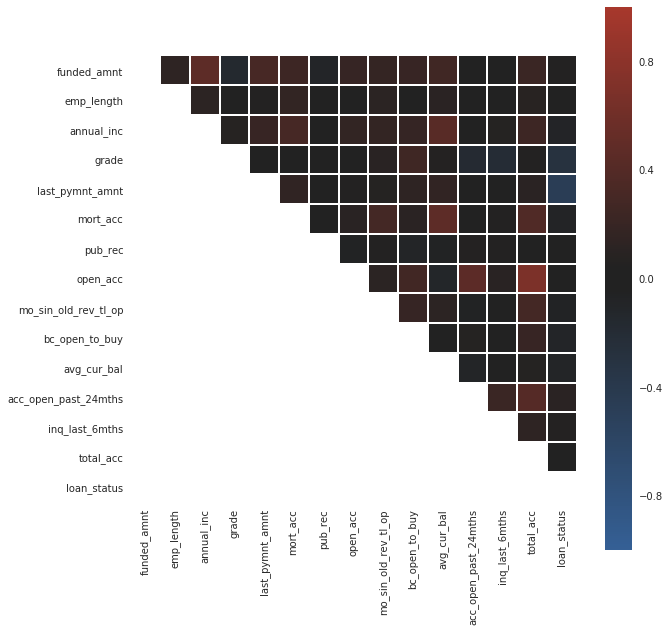

In [32]:
###Heatmap
dataViz = standardloanstatusfinal
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,10)) 
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, s=75, l=40,n=9, center="dark",as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)

# Models

In [33]:

#K Nearest Neighbors(KNN) 
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform', algorithm='auto')

In [34]:
knn.fit(Xtrain,Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
knn.score(Xtrain,Ytrain)

0.8075115207373272

In [36]:
knn.score(Xtest,Ytest)

0.6975268817204301

[0.6 0.6 0.6 ... 0.6 0.  0.8]
KNN accuracy is  0.6975268817204301


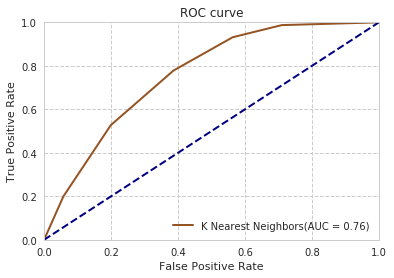

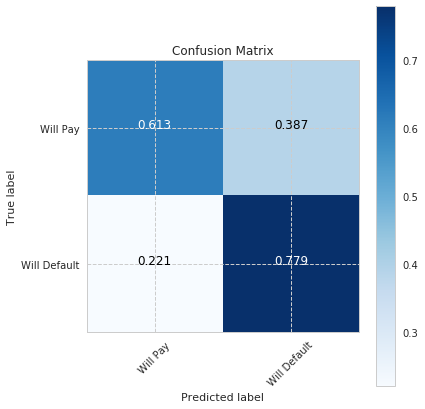

In [37]:

knnpred=knn.predict(Xtest)
knnpredictproba = knn.predict_proba(Xtest)[:,1]
print(knnpredictproba)
KNNAcc = accuracy_score(Ytest,knnpred)
print("KNN accuracy is ",KNNAcc)
#print(accuracy_score(Ytest,ypred))
plotAUC(Ytest,knnpredictproba,'K Nearest Neighbors')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(knnpred, normalize=True)
plt.show()

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(classification_report(Ytest,knnpred))

             precision    recall  f1-score   support

          0       0.73      0.61      0.67      4561
          1       0.68      0.78      0.72      4739

avg / total       0.70      0.70      0.70      9300



In [40]:
from sklearn.linear_model import  LogisticRegression


Logistic regression accuracy is  0.8017204301075269


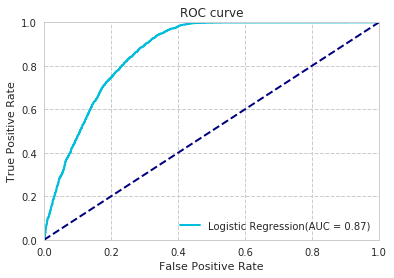

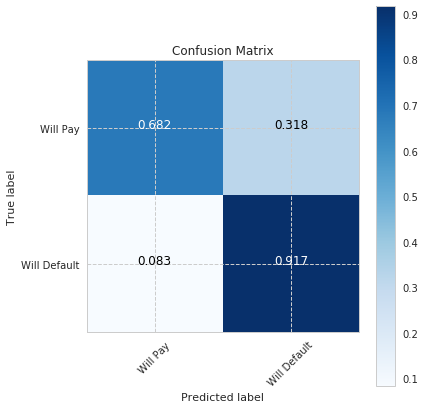

In [41]:
####Logistic Regression
clfLR=LogisticRegression()
clfLR.fit(Xtrain,Ytrain)
#clfLR.fit(X_train,y_train)
LRPredict = clfLR.predict_proba(Xtest)[:,1]
LRPredictbin = clfLR.predict(Xtest)
LRAccuracy = accuracy_score(Ytest,LRPredict.round())
print("Logistic regression accuracy is ",LRAccuracy)

plotAUC(Ytest,LRPredict,'Logistic Regression')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(LRPredictbin, normalize=True)
plt.show()

Random Forest Accuracy is  0.8152688172043011


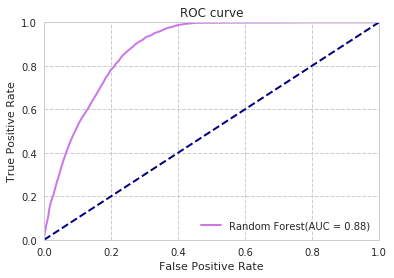

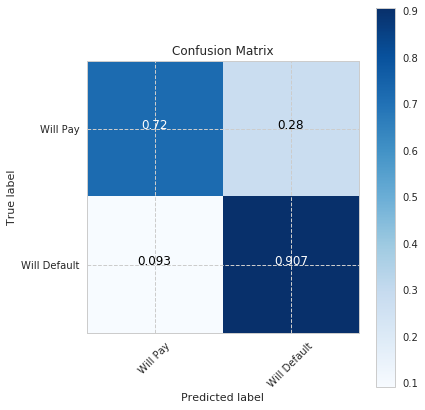

In [42]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#randomForest = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=rand.best_estimator_.max_features,random_state=0 )
randomForest=RandomForestClassifier(n_estimators=100,criterion = "gini")
randomForest.fit(Xtrain,Ytrain)
rfPredict = randomForest.predict(Xtest)
rfPredictproba = randomForest.predict_proba(Xtest)[:,1] #for ROC curve
rfAccuracy = accuracy_score(Ytest,rfPredict)
rocscore = metrics.roc_auc_score(Ytest,rfPredict)
print("Random Forest Accuracy is ", rfAccuracy)
plotAUC(Ytest,rfPredictproba, 'Random Forest')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(rfPredict, normalize=True)
plt.show()

Text(0,0.5,'Normalized Gini Importance')

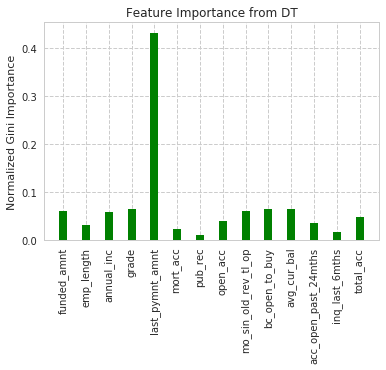

In [43]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(features)-1), randomForest.feature_importances_, width, color='G')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(Xtrain.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

SVM accuracy is  0.7964516129032259


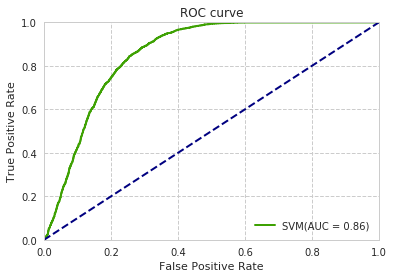

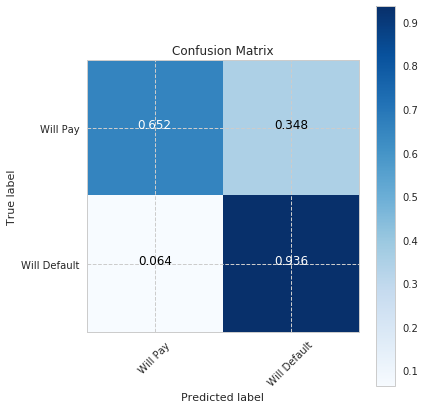

In [44]:
#Support Vector Machines(SVM)
from sklearn import svm

clfsvm = svm.SVC(kernel = "rbf")
clfsvm.fit(Xtrain,Ytrain)
predictionssvm = clfsvm.predict(Xtest)
predictprobasvm = clfsvm.decision_function(Xtest)
SVMAccuracy = accuracy_score(Ytest,predictionssvm)
print("SVM accuracy is ",SVMAccuracy)
plotAUC(Ytest,predictprobasvm, 'SVM')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictionssvm, normalize=True)
plt.show()

MLP accuracy is  0.8078494623655914


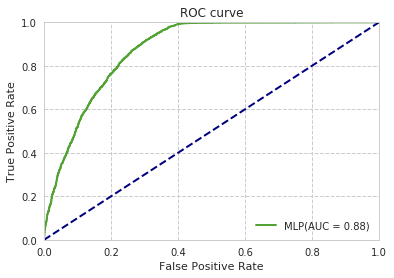

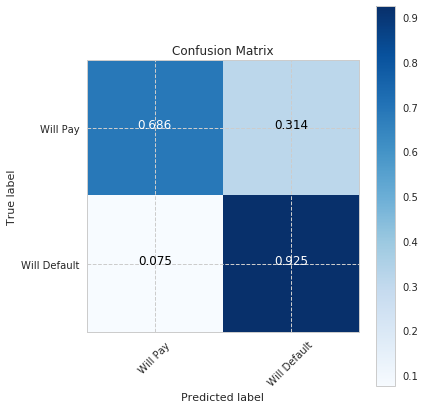

In [45]:
#Multi-Layer Perceptron Classifier

from sklearn.neural_network import MLPClassifier
clfNN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clfNN.fit(Xtrain,Ytrain)     
predictNN = clfNN.predict(Xtest)
predictprobaNN = clfNN.predict_proba(Xtest)[:,1]
NNAccuracy = accuracy_score(Ytest,predictNN)
print("MLP accuracy is ", NNAccuracy)

plotAUC(Ytest,predictprobaNN,'MLP')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictNN, normalize=True)
plt.show()


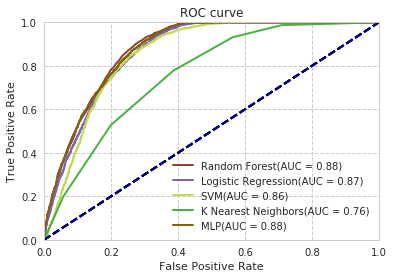

In [46]:
#####Comparison between  different Model
plotAUC(Ytest,rfPredictproba, 'Random Forest')
plotAUC(Ytest,LRPredict,'Logistic Regression')
plotAUC(Ytest,predictprobasvm, 'SVM')
plotAUC(Ytest,knnpredictproba,'K Nearest Neighbors')
plotAUC(Ytest,predictprobaNN,'MLP')
plt.show()

In [47]:
#Precision,recall,F1score for all models¶
print("RF",classification_report(Ytest, rfPredict, target_names=None))
print("SVM",classification_report(Ytest, predictionssvm, target_names=None))
print("LR",classification_report(Ytest, LRPredictbin, target_names=None))
print("KNN",classification_report(Ytest, knnpred, target_names=None))
print("MLP",classification_report(Ytest, predictNN, target_names=None))

RF              precision    recall  f1-score   support

          0       0.88      0.72      0.79      4561
          1       0.77      0.91      0.83      4739

avg / total       0.83      0.82      0.81      9300

SVM              precision    recall  f1-score   support

          0       0.91      0.65      0.76      4561
          1       0.74      0.94      0.82      4739

avg / total       0.82      0.80      0.79      9300

LR              precision    recall  f1-score   support

          0       0.89      0.68      0.77      4561
          1       0.75      0.92      0.82      4739

avg / total       0.82      0.80      0.80      9300

KNN              precision    recall  f1-score   support

          0       0.73      0.61      0.67      4561
          1       0.68      0.78      0.72      4739

avg / total       0.70      0.70      0.70      9300

MLP              precision    recall  f1-score   support

          0       0.90      0.69      0.78      4561
          1    